In [2]:
from pathlib import Path
from optimum.intel.openvino import OVStableDiffusionXLPipeline
import gc

def setup_sdxl_base_model(model_id="stabilityai/stable-diffusion-xl-base-1.0",
                          model_dir="openvino-sd-xl-base-1.0",
                          device="AUTO",
                          compress_weights=True):
    """
    Downloads and converts the SDXL Base model to OpenVINO IR format.
    
    Args:
        model_id (str): Hugging Face model ID.
        model_dir (str): Directory to save the converted model.
        device (str): Inference device ('CPU', 'GPU.0', etc.).
        compress_weights (bool): Whether to apply 8-bit weight compression.
    
    Returns:
        OVStableDiffusionXLPipeline: The optimized pipeline.
    """
    from optimum.intel import OVWeightQuantizationConfig

    model_path = Path(model_dir)
    quantization_config = OVWeightQuantizationConfig(bits=8) if compress_weights else None

    if not model_path.exists():
        pipeline = OVStableDiffusionXLPipeline.from_pretrained(
            model_id,
            compile=False,
            device=device,
            quantization_config=quantization_config
        )
        pipeline.half()
        pipeline.save_pretrained(model_path)
        pipeline.compile()
    else:
        pipeline = OVStableDiffusionXLPipeline.from_pretrained(
            model_path,
            device=device
        )
    gc.collect()
    return pipeline

# Setup Base Model
base_pipeline = setup_sdxl_base_model(
    device="CPU",
)


Fetching 26 files:   0%|          | 0/26 [00:00<?, ?it/s]

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (794 / 794)            │ 100% (794 / 794)                       │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (32 / 32)              │ 100% (32 / 32)                         │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (40 / 40)              │ 100% (40 / 40)                         │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (74 / 74)              │ 100% (74 / 74)                         │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

INFO:nncf:Statistics of the bitwidth distribution:
┍━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┑
│   Num bits (N) │ % all parameters (layers)   │ % ratio-defining parameters (layers)   │
┝━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┥
│              8 │ 100% (195 / 195)            │ 100% (195 / 195)                       │
┕━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┙


Output()

Configuration saved in openvino-sd-xl-base-1.0/openvino_config.json
Compiling the vae_decoder to CPU ...
Compiling the unet to CPU ...
Compiling the vae_encoder to CPU ...
Compiling the text_encoder to CPU ...
Compiling the text_encoder_2 to CPU ...


Generating image...


  0%|          | 0/15 [00:00<?, ?it/s]

Image saved to generated_image.png


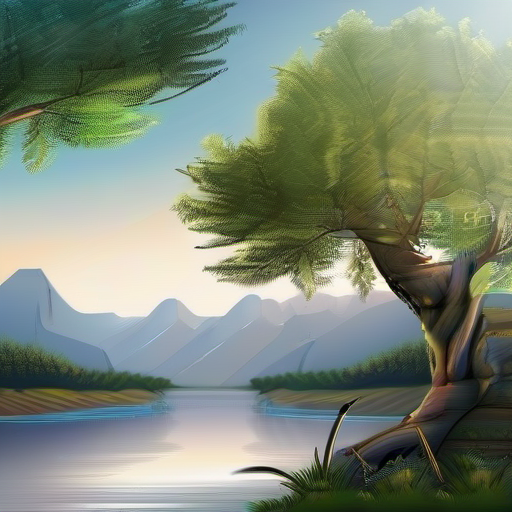

In [5]:
import numpy as np
from pathlib import Path
from PIL import Image
import gc

def generate_image(
    prompt,
    output_path="generated_image.png",
    model_id="stabilityai/stable-diffusion-xl-base-1.0",
    model_dir="openvino-sd-xl-base-1.0",
    device="AUTO",
    num_inference_steps=15,
    height=512,
    width=512,
    seed=314
):
    """
    Generates an image from a text prompt using the SDXL Base model and OpenVINO.

    Args:
        prompt (str): The text prompt for image generation.
        output_path (str): Path to save the generated image.
        model_id (str): Hugging Face SDXL Base model ID.
        model_dir (str): Directory for the converted SDXL Base model.
        device (str): Inference device ('CPU', 'GPU.0', etc.).
        compress_weights (bool): Whether to apply 8-bit weight compression.
        num_inference_steps (int): Number of inference steps for generation.
        height (int): Height of the generated image in pixels.
        width (int): Width of the generated image in pixels.
        seed (int): Random seed for reproducibility.

    Returns:
        PIL.Image.Image: The generated image.
    """
    global base_pipeline
    # Generate Image
    print("Generating image...")
    image = base_pipeline(
        prompt=prompt,
        num_inference_steps=num_inference_steps,
        height=height,
        width=width,
        generator=np.random.RandomState(seed)
    ).images[0]

    # Save Image
    image.save(output_path)
    print(f"Image saved to {output_path}")

    # Cleanup
    del base_pipeline
    gc.collect()

    return image

generate_image("a beautiful landscape with a river and mountains")